In [1]:
#tabular data imports :
import pandas as pd
import numpy as np
import env
from env import user, password, host

# visualization imports:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from scipy.stats import pearsonr, spearmanr
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")
import wrangle as w
import explore as e
import os
directory = os.getcwd()

## Exercises

### Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

### 1. Load your zillow dataset.

In [2]:
df = w.prep_zillow(w.get_zillow_data())
df.head()

,id,bedrooms,bathrooms,sqft,tax_structure,tax_land,taxvalue,yearbuilt,taxamount,county
0,20,4,2.0,3633,222321.0,74104.0,296425,2005,6941.39,LA
1,31,3,4.0,1620,339532.0,508238.0,847770,2011,10244.94,LA
2,33,3,2.0,2077,210192.0,436568.0,646760,1926,7924.68,LA
3,62,0,0.0,1200,595.0,4733.0,5328,1972,91.60,LA
5,99,0,0.0,203,7083.0,7083.0,14166,1960,163.79,LA


In [3]:
# split the data

train, validate_and_test = train_test_split(df, train_size=.60, random_state=123)
validate, test = train_test_split(validate_and_test, test_size=.50, random_state=123)

train.shape, validate.shape, test.shape

((1283062, 10), (427687, 10), (427688, 10))

In [4]:
Xtrain = train.drop(columns=['taxvalue','county'])
Xvalidate = train.drop(columns=['taxvalue','county'])
Xtest = test.drop(columns=['taxvalue','county'])
ytrain = train.taxvalue
yvalidate = validate.taxvalue
ytest = test.taxvalue

Xtrain

,id,bedrooms,bathrooms,sqft,tax_structure,tax_land,yearbuilt,taxamount
926160,1289383,4,3.0,2010,97093.0,22343.0,1947,1958.36
1083249,1508166,3,2.0,1315,101222.0,404892.0,1940,6192.70
613062,853501,3,3.0,2130,238800.0,38200.0,1988,4074.81
320744,446343,3,2.5,1893,193557.0,187240.0,2000,4466.86
632541,880703,4,2.0,2133,370672.0,370672.0,1964,7822.74
...,...,...,...,...,...,...,...,...
1958034,2725440,3,2.0,1973,112543.0,559457.0,1974,7857.04
1242967,1730916,4,2.0,1650,139714.0,12640.0,1976,1765.26
28082,39008,4,3.0,2340,79094.0,24621.0,1969,1560.96
278295,387115,4,2.0,1407,203964.0,203964.0,1973,5013.10


In [5]:
y = ytrain
y

926160     119436
1083249    506114
613062     277000
320744     380797
632541     741344
            ...  
1958034    672000
1242967    152354
28082      103715
278295     407928
774830     305061
Name: taxvalue, Length: 1283062, dtype: int64

In [6]:
# X -> set of all ind features (just one here)
# y -> dependent variable, target.
X = train[['sqft']]
y = train['taxvalue']

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.
Here is some sample code to get you started:

In [7]:
baseline_mean = ytrain.mean()
baseline_mean

459847.1029007172

In [8]:
baseline_med = ytrain.median()
baseline_med

328215.5

In [9]:
# make an object
lm = LinearRegression()
# fit an object
lm.fit(X, ytrain)
# use an object
yhat = lm.predict(X)

In [10]:
mean_baseline = y.mean()
med_baseline = y.median()

In [11]:
predictions_df = pd.DataFrame(
{
    'y_act': y.values,
    'yhat': yhat,
    'mean_baseline' : mean_baseline,
    'med_baseline': med_baseline
}, index=train.index)

### 3. Plot the residuals for the linear regression model that you made.

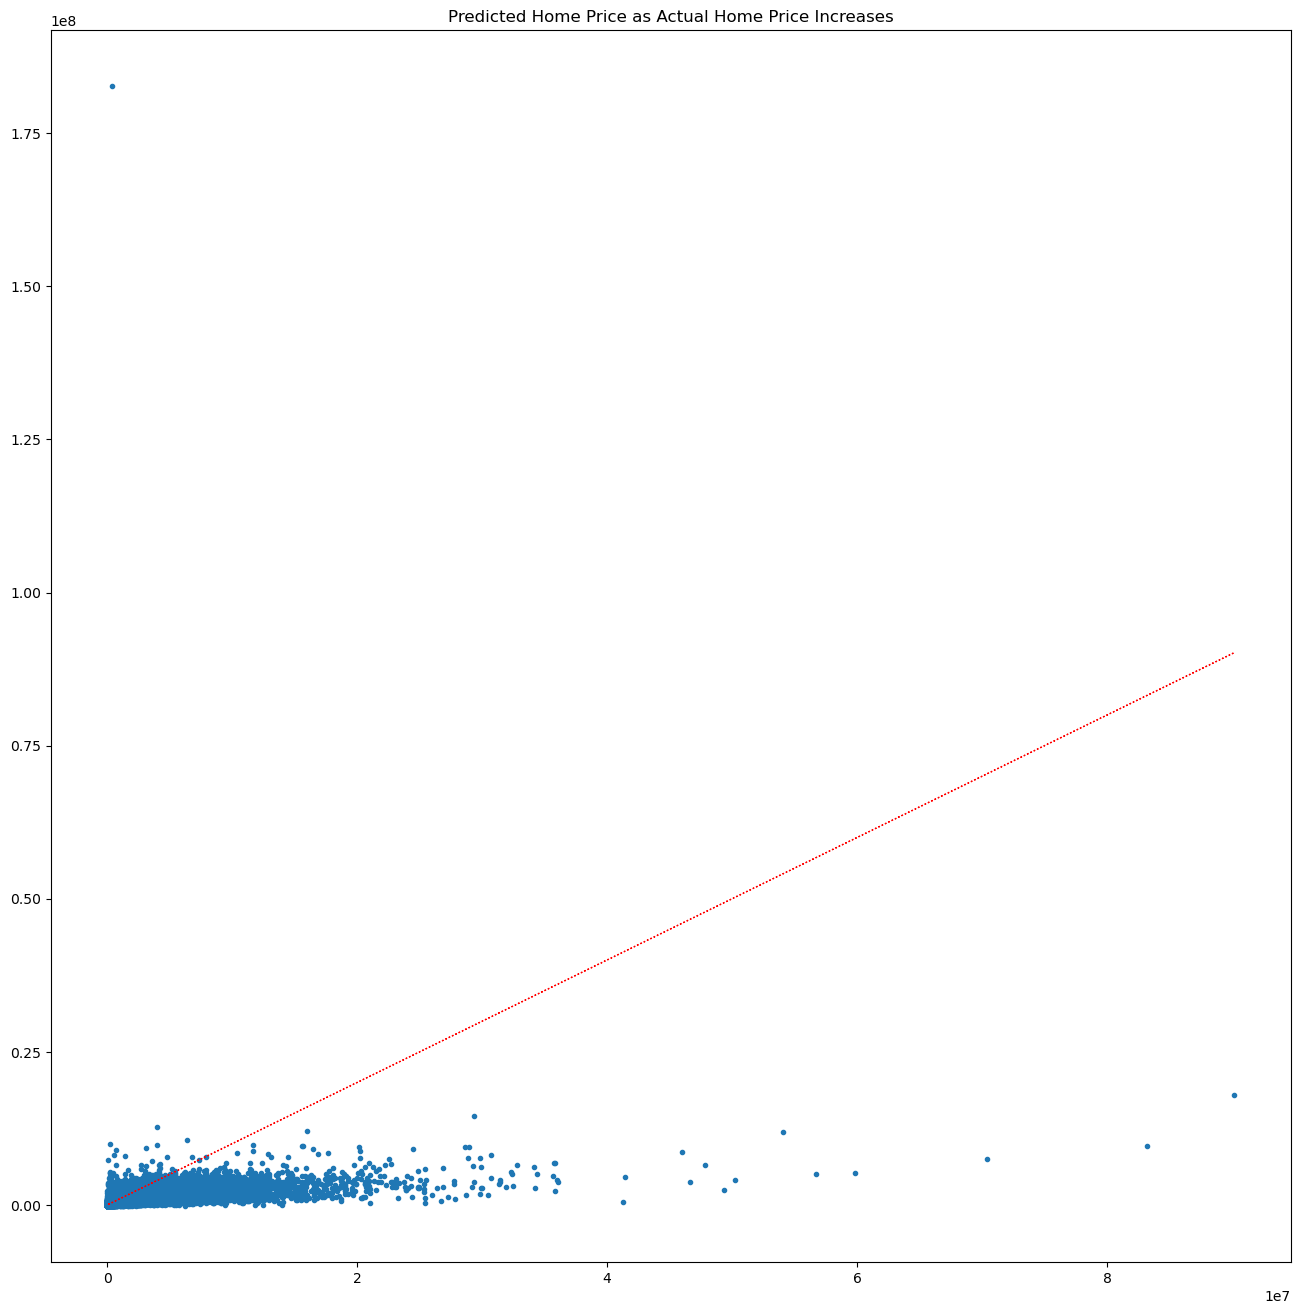

In [12]:
# plot residuals the first way
plt.figure(figsize=(16,16))
plt.scatter(y, yhat, marker='.')
plt.plot(y,y, ls=':',linewidth=1, color='r')
plt.title('Predicted Home Price as Actual Home Price Increases')
plt.show()

# plot them the other way

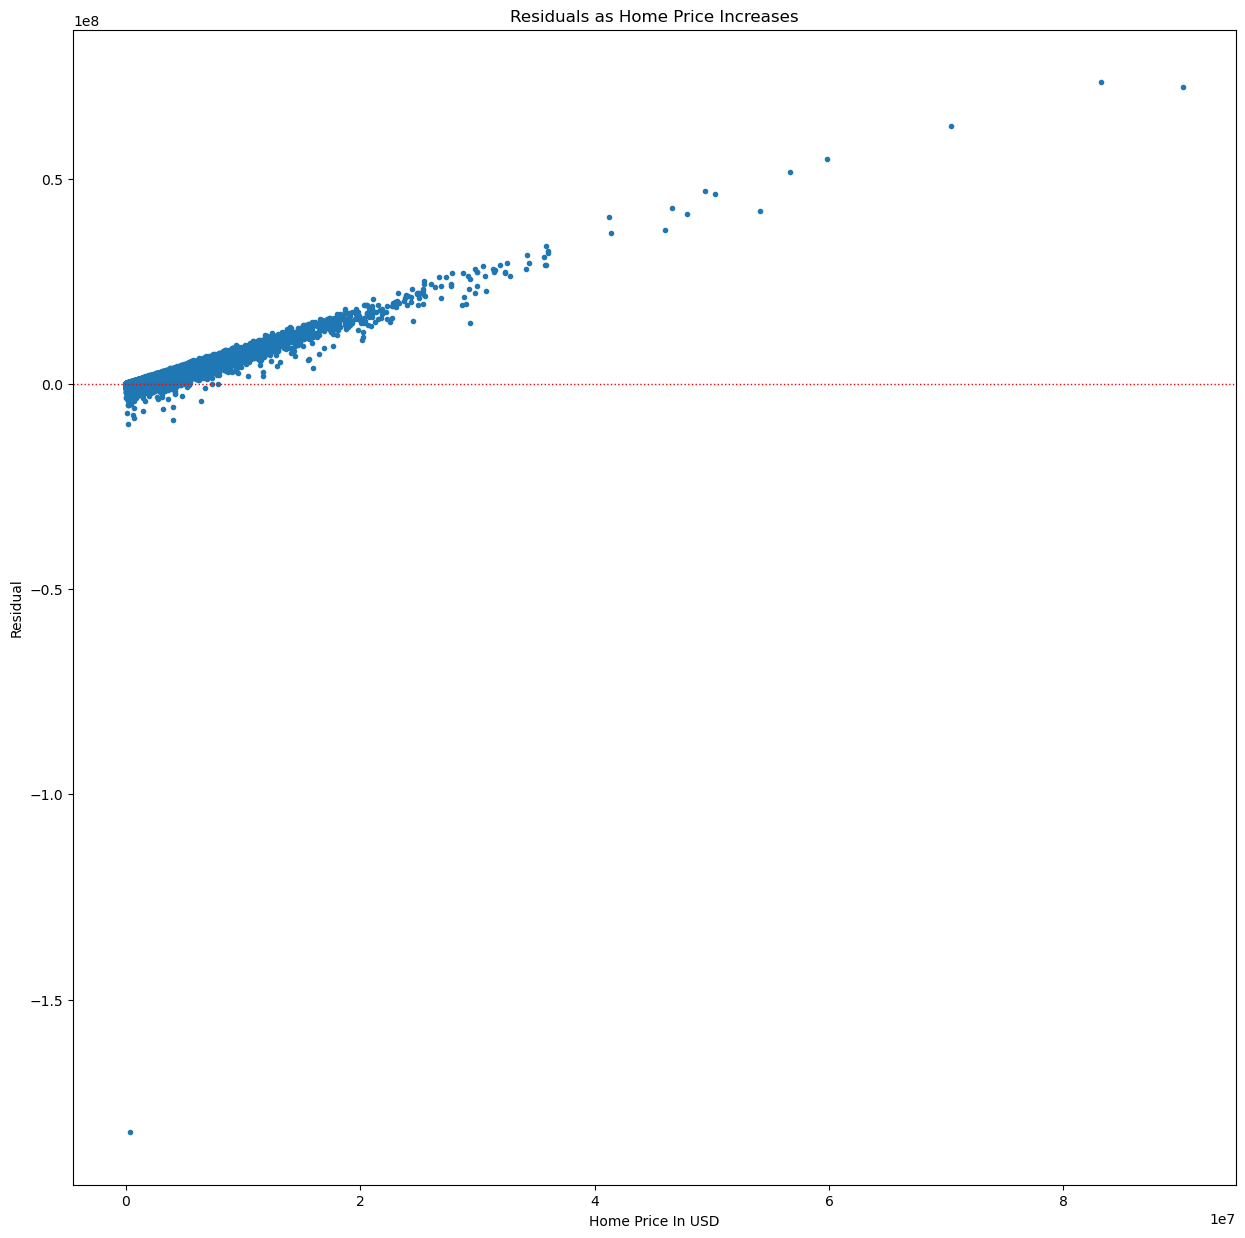

In [13]:
plt.figure(figsize=(15,15))
plt.scatter(y, (y-yhat), marker='.')
plt.axhline(0,ls=':',linewidth=1, color='r')
plt.title('Residuals as Home Price Increases')
plt.xlabel('Home Price In USD')
plt.ylabel('Residual')
plt.show()

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

#### Variables

#### x: sqft
#### y: actual taxvalue
#### baselinemean: sqft baseline prediction
#### yhat: taxvalue OLS prediction

In [14]:
predictions_df.columns

Index(['y_act', 'yhat', 'mean_baseline', 'med_baseline'], dtype='object')

In [15]:
# compute the error on these two baselines:
mean_baseline_rmse = mean_squared_error(predictions_df.mean_baseline, y) ** (1/2)
med_baseline_rmse = mean_squared_error(predictions_df.med_baseline, y) ** (1/2)

In [16]:
mean_baseline_rmse < med_baseline_rmse

True

In [17]:
#  mean providees our best baseline,
print(f'Root mean squared error for the mean value of home price is ${round(mean_baseline_rmse, 3)}.')

Root mean squared error for the mean value of home price is $671258.349.


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
# Squared Errors, 
# residuals squared
squared_errors = (predictions_df['y_act'] - predictions_df['yhat']) ** 2
# Sum of Squared Error, 
sse = squared_errors.sum()
# Mean Squared error, 
mse = sse / train.shape[0] #alternatively, len(train), y_pred.shape[0]
# Root mean Squared Error
# square root the mean squared error!
rmse = mse**0.5

In [20]:
rmse

560727.5898448818

In [21]:
sse

4.034144904636605e+17

### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [22]:
predictions_df.columns

Index(['y_act', 'yhat', 'mean_baseline', 'med_baseline'], dtype='object')

In [23]:
# do that calculation again for our baseline
# Squared Errors, 
# residuals squared
squared_errors_bl = (predictions_df['y_act'] - predictions_df['mean_baseline']) ** 2
# Sum of Squared Error, 
sse_bl = squared_errors_bl.sum()

In [24]:
sse, sse_bl

(4.034144904636605e+17, 5.781320460656855e+17)

In [25]:
sse_bl > sse

True

### 7. What is the amount of variance explained in your model?

In [26]:
# ESS = Δ(y_pred, y_mean)
ESS = ((predictions_df['yhat'] - predictions_df['mean_baseline']) ** 2).sum()
ESS

1.747175556022442e+17

In [27]:
ESS / (ESS + sse)

0.3022104669533007

In [28]:
# actual r_squared score
r2_score(y, predictions_df['yhat'])

0.3022104669530361

### 8. Is your model better than the baseline model?

In [29]:
mean_baseline_rmse > mean_squared_error(y, predictions_df['yhat'], squared=False)

True

In [30]:
mean_baseline_rmse

671258.3485934747

In [31]:
mean_squared_error(y, predictions_df['yhat'], squared=False)

560727.5898448818

#### we have a reduction of error from our baseline to our 
#### actual linear regression model.
#### visualuzation of our residuals do not quite match up to a perfect
#### idea of a regression, and we have significant amount of trend to capture

### 9. Create a file named evaluate.py that contains the following functions.
- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [32]:
def plot_residuals(y, yhat):
    plt.figure(figsize=(15,15))
    plt.scatter(y, (y-yhat),marker='.')
    plt.axhline(0,ls=':', linewidth=1, color='r')
    plt.title('Residuals as Home Price Increases')
    plt.xlabel('Home Price In USD')
    plt.ylabel('Residual')
    plt.show()

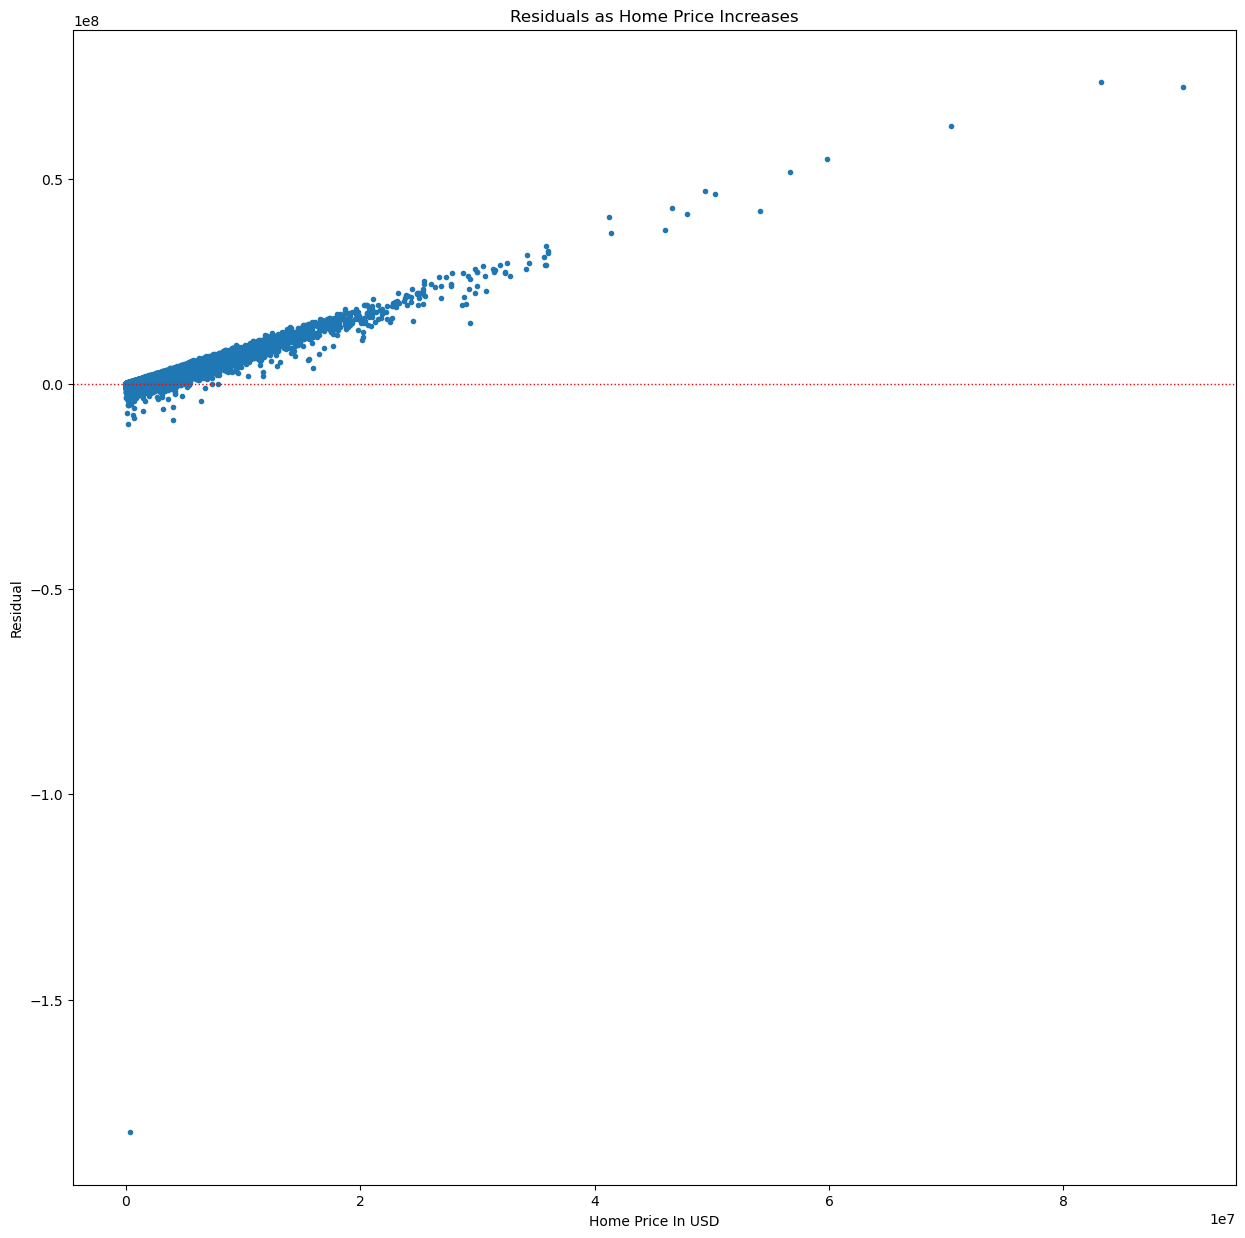

In [33]:
plot_residuals(y, yhat)

In [34]:
def regression_errors(y, yhat):
    preds = pd.DataFrame({
        'y': y,
        'yhat': yhat,
        'mean': y.mean()
    })
    
    squared_errors = (preds['y'] - preds['yhat']) ** 2
    # Sum of Squared Error, 
    sse = squared_errors.sum()
    mse = sse / len(preds)
    rmse = mse ** 0.5
    ess = ((preds['yhat'] - preds['mean']) **2).sum()
    tss = ess + sse
    return sse, ess, tss, mse, rmse

In [35]:
regression_errors(y, yhat)

(4.034144904636605e+17,
 1.747175556022442e+17,
 5.781320460659046e+17,
 314415430013.24994,
 560727.5898448818)

In [36]:
def baseline_mean_errors(y):
    preds = pd.DataFrame({
        'y': y,
        'mean': y.mean()
    })
    
    squared_errors_bl = (preds['y'] - preds['mean']) ** 2
    # Sum of Squared Error, 
    sse = squared_errors_bl.sum()
    mse = sse / len(preds)
    rmse = mse ** 0.5
    return sse, mse, rmse

In [37]:
baseline_mean_errors(y)

(5.781320460656855e+17, 450587770556.43884, 671258.3485934747)

In [38]:
def better_than_baseline(y, yhat):
    '''
    return a boolean for if the model beats the baseline prediction
    '''
    rmse_model = mean_squared_error(y, yhat, squared=False)
    sse, mse, rmse_baseline = baseline_mean_errors(y)
    return (rmse_model < rmse_baseline)

In [39]:
better_than_baseline(y, yhat)

True